In [36]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms

In [62]:
trans = transforms.Compose([transforms.Resize((256,256)),
                          transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                          ])
trainset = torchvision.datasets.ImageFolder(root="classification",
                                           transform = trans)

In [63]:
trainset.__getitem__(0)

(tensor([[[ 0.1608,  0.1608,  0.1608,  ...,  0.1451,  0.1451,  0.1529],
          [ 0.1686,  0.1686,  0.1686,  ...,  0.1451,  0.1451,  0.1529],
          [ 0.1765,  0.1765,  0.1765,  ...,  0.1373,  0.1373,  0.1451],
          ...,
          [-0.6627, -0.6706, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6627, -0.6706, -0.6863,  ..., -0.7020, -0.7020, -0.7020],
          [-0.6627, -0.6706, -0.6863,  ..., -0.7020, -0.7020, -0.7020]],
 
         [[-0.2000, -0.2000, -0.2000,  ..., -0.2314, -0.2314, -0.2235],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2314, -0.2314, -0.2235],
          [-0.1843, -0.1843, -0.1843,  ..., -0.2392, -0.2392, -0.2314],
          ...,
          [-0.6784, -0.6863, -0.7020,  ..., -0.7490, -0.7490, -0.7490],
          [-0.6784, -0.6863, -0.7020,  ..., -0.7490, -0.7490, -0.7490],
          [-0.6784, -0.6863, -0.7020,  ..., -0.7490, -0.7490, -0.7490]],
 
         [[-0.3882, -0.3882, -0.3882,  ..., -0.4039, -0.4039, -0.3961],
          [-0.3804, -0.3804,

In [64]:
len(trainset)

18037

In [65]:
classes = trainset.classes
classes

['.ipynb_checkpoints',
 '00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17']

In [83]:
trainloader = DataLoader(trainset,
                        batch_size = 1,
                        shuffle = True,
                        num_workers = 2)

In [84]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(labels)

tensor([17])


In [85]:
def imshow(img):
    img = img / 2 + 0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img,(1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)


torch.Size([1, 3, 256, 256])
(3, 256, 256)
(256, 256, 3)
torch.Size([1, 3, 256, 256])
torch.Size([3, 256, 256])
   16 


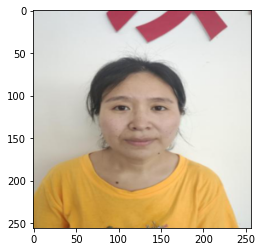

In [86]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(1)))

In [99]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(3,6,5) # 252
        self.pool = nn.MaxPool2d(2,2) # 126
        self.conv2 = nn.Conv2d(6,16,5) # 122
        
        self.fc1 = nn.Linear(16*61*61, 2400)
        self.fc2 = nn.Linear(2400,1200)
        self.fc3 = nn.Linear(1200,600)
        self.fc4 = nn.Linear(600,512)
        self.fc5 = nn.Linear(512,256)
    
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        
        x = self.pool(F.relu(self.conv2(x)))
        
        x = x.view(-1,16*61*61)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        
        return x

net = Net()

        
        
        
        

In [101]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 10 == 9:
            print('[%d, %5d] loss : %.3f' % (epoch+1, i+1, running_loss / 10))
            running_loss = 0.0
print('Finished Training')

[1,    10] loss : 2.902
[1,    20] loss : 2.603
[1,    30] loss : 3.529
[1,    40] loss : 2.492
[1,    50] loss : 3.057
[1,    60] loss : 2.350
[1,    70] loss : 1.992
[1,    80] loss : 2.151
[1,    90] loss : 2.162
[1,   100] loss : 2.433
[1,   110] loss : 3.148
[1,   120] loss : 2.285
[1,   130] loss : 2.946
[1,   140] loss : 2.300
[1,   150] loss : 2.736
[1,   160] loss : 2.479
[1,   170] loss : 2.698
[1,   180] loss : 2.367
[1,   190] loss : 2.408
[1,   200] loss : 2.840


KeyboardInterrupt: 